In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as rmse
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv('linear_dependency.csv')
x = np.array(data_set['d_param'])
y_sw = np.array(data_set['porosity_Schwarz_p'])
y_g = np.array(data_set['porosity_Gyroid'])

In [6]:
degree = 2
poly = PolynomialFeatures(degree=degree)
poly_features = poly.fit_transform(x.reshape(-1, 1))
poly_features

array([[ 1.        , -0.9850858 ,  0.97039403],
       [ 1.        , -0.83433666,  0.69611766],
       [ 1.        , -0.60292521,  0.36351881],
       [ 1.        , -0.35709911,  0.12751977],
       [ 1.        , -0.35088529,  0.12312049],
       [ 1.        , -0.26232069,  0.06881214],
       [ 1.        , -0.08615109,  0.00742201],
       [ 1.        ,  0.18464827,  0.03409499],
       [ 1.        ,  0.42948591,  0.18445814],
       [ 1.        ,  0.44617778,  0.19907461],
       [ 1.        ,  0.46539461,  0.21659214],
       [ 1.        ,  0.58393566,  0.34098085],
       [ 1.        ,  0.64254994,  0.41287043],
       [ 1.        ,  0.71322919,  0.50869587],
       [ 1.        ,  0.72131502,  0.52029536],
       [ 1.        ,  0.77842614,  0.60594726],
       [ 1.        ,  0.86777827,  0.75303912],
       [ 1.        ,  0.8737793 ,  0.76349027],
       [ 1.        ,  0.95324624,  0.90867839],
       [ 1.        ,  0.95956098,  0.92075728]])

In [8]:
model = LinearRegression()
model.fit(poly_features, y_sw)
print(model.intercept_, model.coef_)
y_sw_pred = model.predict(poly_features)

0.6931331797321914 [ 0.         -0.06150581  0.05036231]


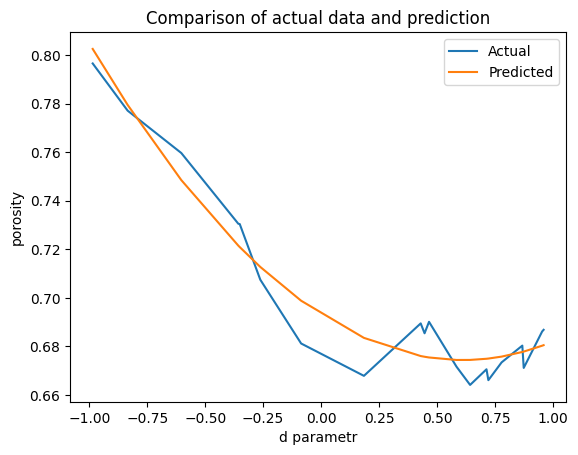

In [22]:
fig, ax = plt.subplots()
ax.plot(x, y_sw, label='Actual')
ax.plot(x, y_sw_pred, label='Predicted')
plt.title("Comparison of actual data and prediction")
plt.xlabel("d parametr")
plt.ylabel("porosity")
plt.legend()
plt.show()

In [11]:
rmse(y_true=y_sw, y_pred=y_sw_pred, squared=False)

0.009368539199775455

In [7]:
def calc_value_for_model(x, y, n):
    list_degrees = []
    list_mean_rmse = []
    for degree in range(1, n+1):
        poly = PolynomialFeatures(degree=degree)
        poly_features = poly.fit_transform(x.reshape(-1, 1))
        model = LinearRegression()
        score_for_cv = cross_val_score(model, poly_features, y, cv=4, scoring='neg_mean_squared_error')
        mean_rmse = np.mean(np.sqrt(-score_for_cv))
        list_degrees.append(degree)
        list_mean_rmse.append(mean_rmse)
    return list_degrees, list_mean_rmse

In [43]:
degree_for_sw, rmse_for_sw = calc_value_for_model(x=x, y=y_sw, n=8)
degree_for_g, rmse_for_g = calc_value_for_model(x=x, y=y_g, n=8)

In [50]:
list_for_graf = degree_for_sw[:4]
rmse_for_sw_for_graf = rmse_for_sw[:4]
rmse_for_g_for_graf = rmse_for_g[:4]

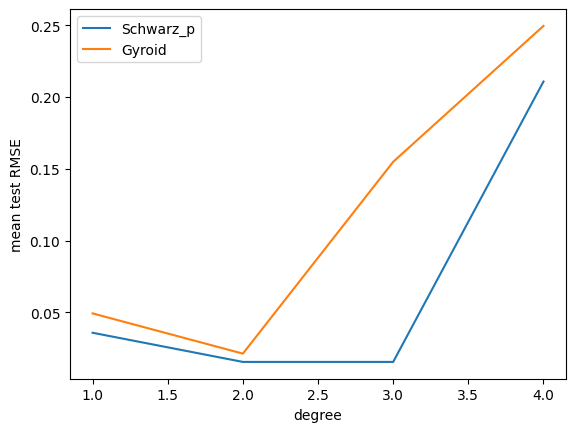

In [51]:
list_for_graf = degree_for_sw[:4]
fig, ax = plt.subplots()
ax.plot(list_for_graf, rmse_for_sw_for_graf, label='Schwarz_p')
ax.plot(list_for_graf, rmse_for_g_for_graf, label='Gyroid')
plt.title("")
plt.xlabel("degree")
plt.ylabel("mean test RMSE")
plt.legend()
plt.show()

In [53]:
data_for_table = pd.DataFrame(columns=['Degree', 'Mean test RMSE for Schwarz', 'Mean test MSE for Gyroid'])
data_for_table['Degree'] = degree_for_sw
data_for_table['Mean test RMSE for Schwarz'] = rmse_for_sw
data_for_table['Mean test MSE for Gyroid'] = rmse_for_g
data_for_table.head(10)

,Degree,Mean test RMSE for Schwarz,Mean test MSE for Gyroid
0,1,0.035765,0.049244
1,2,0.015448,0.021227
2,3,0.015445,0.154869
3,4,0.210800,0.249551
4,5,0.079919,0.990721
5,6,2.419949,2.262439
6,7,18.010812,6.147779
7,8,121.490580,74.947167


In [8]:
def calc_y_pred(x, y, degree):
    poly = PolynomialFeatures(degree=degree)
    poly_features = poly.fit_transform(x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(poly_features, y)
    print(model.intercept_, model.coef_)
    y_pred = model.predict(poly_features)
    return y_pred
y_sw_pred = calc_y_pred(x=x, y=y_sw, degree=3)
y_sw_pred_2 = calc_y_pred(x=x, y=y_sw, degree=2)
y_g_pred = calc_y_pred(x=x, y=y_g, degree=2)

0.6934721130649308 [ 0.         -0.06816784  0.04984266  0.01013945]
0.6931331797321914 [ 0.         -0.06150581  0.05036231]
0.9527763725998283 [ 0.          0.09674384 -0.06645933]


In [68]:
def viza_for_compare(x, y, y_pred, surface):
    fig, ax = plt.subplots()
    ax.plot(x, y, label='Actual')
    ax.plot(x, y_pred, label='Predicted')
    plt.title(f"Comparison of actual data and prediction for {surface} surface")
    plt.xlabel("d parametr")
    plt.ylabel("Porosity")
    plt.legend()
    plt.show()

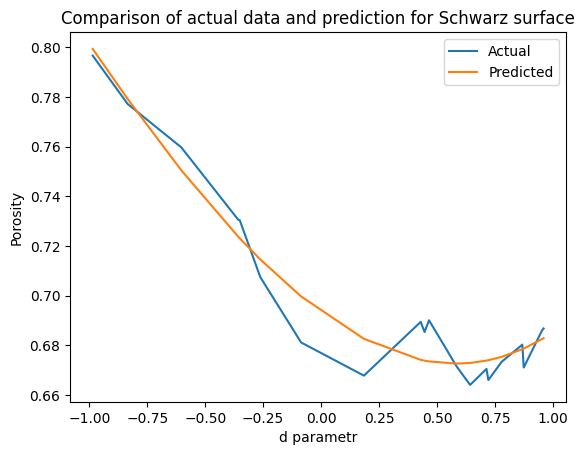

In [63]:
viza_for_compare(x=x, y=y_sw, y_pred=y_sw_pred, surface='Schwarz')

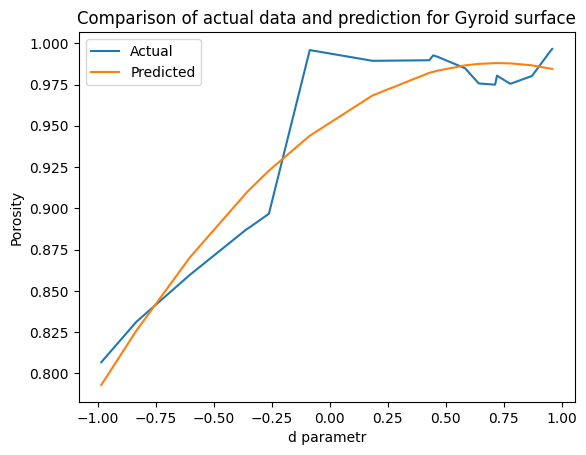

In [64]:
viza_for_compare(x=x, y=y_g, y_pred=y_g_pred, surface='Gyroid')

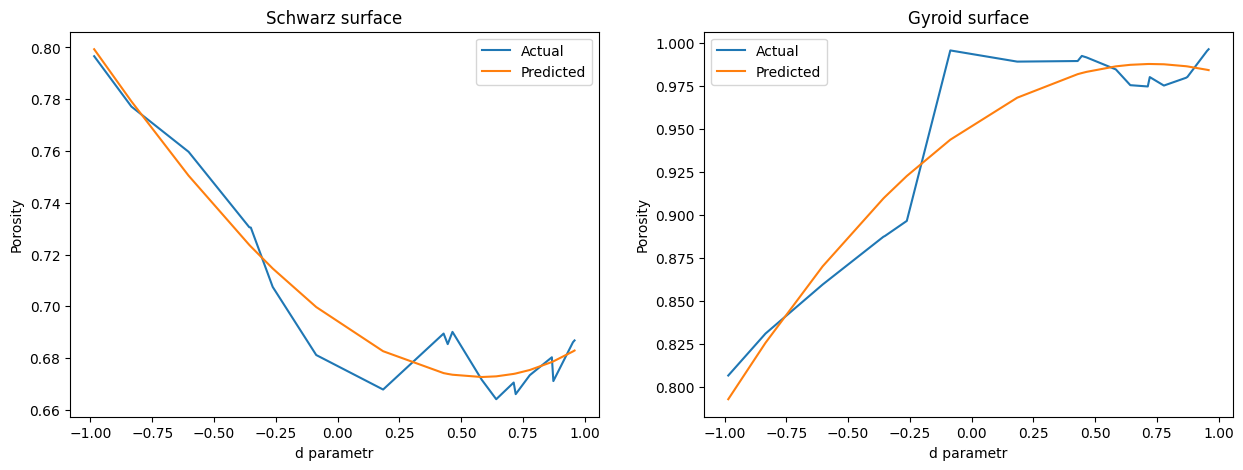

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(x, y_sw, label='Actual')
ax1.plot(x, y_sw_pred, label='Predicted')
ax2.plot(x, y_g, label='Actual')
ax2.plot(x, y_g_pred, label='Predicted')
ax1.set_title('Schwarz surface')
ax2.set_title('Gyroid surface')
ax1.set_xlabel('d parametr')
ax1.set_ylabel('Porosity')
ax2.set_xlabel('d parametr')
ax2.set_ylabel('Porosity')
ax1.legend()
ax2.legend()
plt.show()